In [87]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import common

common.pltsetup()

In [88]:
def load_distrib(name):
    contents = Path(f'data/forks/{name}.txt').read_text()
    lines = [line.split() for line in contents.splitlines() if line]
    x = [int(v) for v, _ in lines]
    y = [int(v) for _, v in lines]
    y_cum = np.cumsum(y[::-1])[::-1]
    return (x, y, y_cum)

## Forks aggregation process

In [89]:
data = {}

def adapter_import_distrib(entry, pathname):
    data[entry] = {}
    x, y, y_cum = load_distrib(pathname)
    data[entry]['raw'] = dict(zip(x, y))
    data[entry]['cum'] = dict(zip(x, y_cum))
    
adapter_import_distrib('ghtorrent', 'networks/ghtorrent')
adapter_import_distrib('swh', 'networks/swh_rev')
adapter_import_distrib('swh_rootdir', 'networks/swh_rootdir')
adapter_import_distrib('cliques_partition', 'cliques_partition/swh')

name = ["ghtorrent","swh","swh_rootdir","cliques_partition"]

In [90]:
no = sum(x * y for x, y in data['swh']['raw'].items())

yysum={}
xxsum={}
for s in name:
    x=[]
    y=[]
    for key in sorted(data[s]["raw"].keys()):
        x.append(key)
        y.append(data[s]["raw"][key])
    xx=np.array(x)
    yy=np.array(y)
    yysum[s]=np.zeros(len(y))
    xxsum[s]=xx
    # distribution cumulée de base
    for i in range(len(yysum[s])):
        yysum[s][i]=1*yy[i:].sum()
        yysum[s][i]=1-(xx[i:]*yy[i:]).sum()/no
    print(xx[0],yysum[s][0])

# liste des x complete
xxsum2={}
yysum2={}
for s in name:
    for i in range(len(xxsum[s])):
        x=xxsum[s][i]
        y=yysum[s][i]
        try:
            xxsum2[x][s]=1
        except:
            xxsum2[x]={s:1}
        try:
            yysum2[x][s]=y
        except:
            yysum2[x]={s:y}
    try:
        xxsum2[x+1][s]=1
        yysum2[x+1][s]=1
    except:
        xxsum2[x+1]={s:1}
        yysum2[x+1]={s:1}
        

default={}
for s in name:
    default[s]=1

for x in sorted(yysum2.keys(),reverse=True):
    for s in name:
        if s not in yysum2[x].keys():
            yysum2[x][s]=default[s]
        else:
            default[s]=yysum2[x][s]

xxsum3=np.array(sorted(xxsum2.keys()))
yysum3={}
for s in name:
    yysum3[s]=np.zeros(len(xxsum3))
    for i in range(len(xxsum3)):
        yysum3[s][i]=yysum2[xxsum3[i]][s]

1 0.0
1 0.0
1 0.0
1 2.680225309725781e-05


In [91]:
x, y, y_cum = load_distrib('networks_largest_analysis/intersect')
intersect = dict(zip(x, y))

In [92]:
x=[]
y=[]
for key in sorted(intersect.keys()):
    x.append(key)
    y.append(intersect[key])
xx=np.array(x)
yy=np.array(y)
yysum=np.zeros(len(y))
for i in range(len(yysum)):
        yysum[i]=(x[i:]*yy[i:]).sum()
print(xx[0],yysum[0])

for s in ["ghtorrent"]:
    xref=[]
    yref=[]
    for key in sorted(data[s]["raw"].keys()):
        xref.append(key)
        yref.append(data[s]["raw"][key])
    xxref=np.array(xref)
    yyref=np.array(yref)
    yysumref=np.zeros(len(yref))
    for i in range(len(yysumref)):
        yysumref[i]=(xref[i:]*yyref[i:]).sum()
    print(xxref[0],yysumref[0])


print(len(yysum),len(yysumref))
xdiff=[]
ydiff=[]
for i in range(len(xx)):
    iref=np.where(xxref>=xx[i])[0].min()
    xdiff.append(xx[i])
    ydiff.append(((yysumref[iref]/yysumref[0]-yysum[i]/yysum[0])))

1 1624226.0
1 41451739.0
744 1684


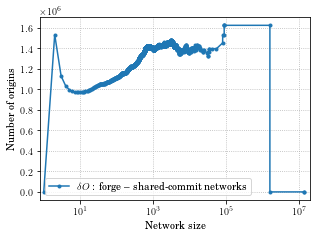

In [93]:
plt.figure(figsize=(4.5, 3.4))
i=1
plt.semilogx(xxsum3,yysumref[0]*(yysum3[name[0]]-yysum3[name[i]]),".-",label="$\delta O$ : forge -- shared-commit networks", rasterized=True)
plt.xlabel("Network size")
plt.ylabel("Number of origins")
plt.legend()
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim([0.8,2e7])
plt.savefig("../img/forks/gr/Diff_WCCDF_gh-swhrev.pdf")
plt.show()

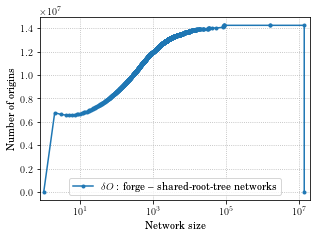

In [94]:
plt.figure(figsize=(4.5, 3.4))
i = 2
plt.semilogx(xxsum3,yysumref[0]*(yysum3[name[0]]-yysum3[name[i]]),".-",label="$\delta O$ : forge -- shared-root-tree networks", rasterized=True)
plt.xlabel("Network size")
plt.ylabel("Number of origins")
plt.legend()
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig("../img/forks/gr/Diff_WCCDF_gh-swhrootdir.pdf")
plt.xlim([0.8,2e7])
plt.show()

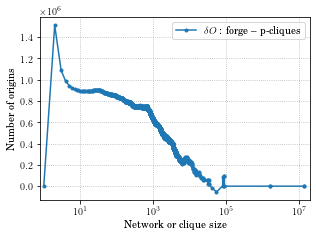

In [95]:
plt.figure(figsize=(4.5, 3.4))
i = 3
plt.semilogx(xxsum3,yysumref[0]*(yysum3[name[0]]-yysum3[name[i]]),".-",label="$\delta O$ : forge -- p-cliques", rasterized=True)
plt.xlabel("Network or clique size")
plt.ylabel("Number of origins")
plt.legend()
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig("../img/forks/gr/Diff_WCCDF_gh-pcliques.pdf")
plt.xlim([0.8,2e7])
plt.show()

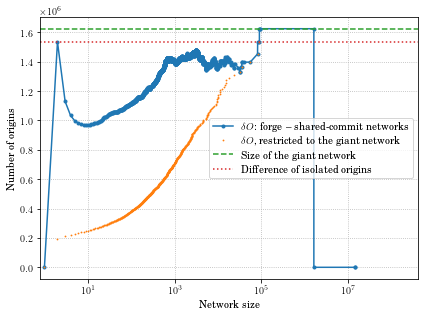

In [96]:
plt.figure(figsize=(6, 4.5))
i=1
plt.semilogx(xxsum3,yysumref[0]*(yysum3[name[0]]-yysum3[name[i]]),".-",label="$\delta O $: forge -- shared-commit networks", rasterized=True)
plt.semilogx(xdiff,(yysum[0]-yysum),".",markersize=1.6,label='$\delta O$, restricted to the giant network', rasterized=True)
plt.semilogx([0.8,4e8],[1624226,1624226],"--",label='Size of the giant network')
plt.semilogx([0.8,4e8],[1533848,1533848],":",label='Difference of isolated origins')
plt.xlabel("Network size")
plt.ylabel("Number of origins")
plt.legend()
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlim([0.8,4e8])
plt.savefig("../img/forks/gr/Diff_WCCDF_all.pdf")
plt.show()